<a href="https://colab.research.google.com/github/marcos-code/Mod-4-Introdu-o-ML/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

#importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")

# ver as primeiras entradas
df.head()


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


O dataset importado contém a variável `GrLiArea` contendo o tamanho do imóvel(m²) e a variável alvo `SalePrice` com o preço de venda do mesmo. Vou plotar um gráfico de dispersão para termos ideia de como os pontos estão relacionados.

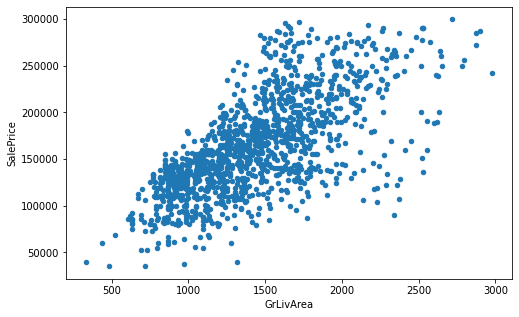

In [4]:
# plotando gráfico de dispersão
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

# Regressão Linear Simpes com `scikit-learn`
Uma vez que você tenha feito toda uma análise exploratótia, definido variáveis e preparado os dados adequadamente, chegou o momento de construir a Regressão Linear Simples. No mundo real, você deve dividir o seu conjunto de dados em train e test de maneira que eles sejam mutuamente exclusivos.
Essa etapa é de extrema importância, pois vai tornar o modelo mais genérico e com melhor precisão em relação aos dados novos que venham a ser entrada do mesmo. Neste dataset, vou separar 20% dos dados para o teste no final.


In [5]:
# importar as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Vou separar a variável dependente (SalePrice) da nossa feature, e usar a função train_test_split para fazer a divisão entre dados de treino e teste


In [7]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre fearures matrix e target vector - mas atenção com 1-feature (reshape)
X = df['GrLivArea']
y = df['SalePrice']


# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)


# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)


#5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)


ValueError: ignored

Mais importante que se desesperar é entender o que aconteceu. A mensagem de erro acima é por causa do sklearn.pipeline do pacote. Ela acontece porque passamos apenas uma variável (feature) na variável X. Veja esta parte da mensagem do erro:

...if your data has a single feature or array.reshape(1, -1)

Uma coisa que você deve se lembrar é que o scikit-learn espera duas coisas nesta etapa:

* Que a variável X seja sempre um np.array com duas dimensões
* Que a variável y seja sempre um np.array com uma dimensão
Olhe os prints abaixo para ver as dimensões de cada variável nossa e ver que não estão de acordo com o que o pacote espera.

In [11]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("X (reshape):\t",X.values.reshape(-1,1).shape)

print("y:\t\t", y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


Isso é facil de resolver. Qndo for preciso mudar a dimensão de um array para atender a condição acima, use .reshape(-1,1).

In [12]:
# 1. Escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice']


# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)


# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Se estamos falando de Regressão Linear, estamos falando de construir reta. Essa reta possui coeficientes associados com os ângulos de inclinação e intercepto. Neste caso específico da Regressão Linear Simples, temos apenas um coeficiente de regressão.

Para obtermos os coeficiente de regressão e intercepto, basta acessar os atributos do modelo diretamente da variável ml_model.



In [13]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)


Coeficiente:	 [84.91196684]
Intercepto:	 42709.51552360087


Como estamos trabalhando com um problema de baixa dimensionalidade, é possível plotar a nossa reta, obtida pelo modelo de Machine Learning sobre os dados do nosso dataset. Veja como ela representa bem nosso conjunto de pontos.

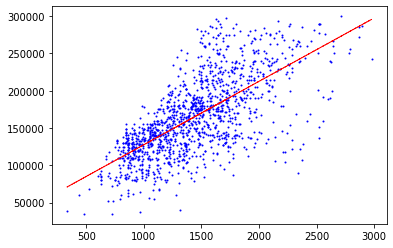

In [15]:
# plotar reta de dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1)

Com o modelo treinado, ele já está pronto para fazer previsões em dima de dados novos. Como separamos lá em cima dos dados de teste na variável y_test, vamos fazer as previsões usando o método `predict()` e armazenar na variável `y_pred`

In [16]:
# 5. Fazer previsões em ciam de novos dados
y_pred = model.predict(X_test)


Tem uma frase muito conhecida na área de Comando e Controle (C2) que diz que "você não controla o que não pode medir".

Um modelo de Machine Learning deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* R-Squared - métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

* Mean Absolut Error (MAE) - é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* Mean Squared Error (MSE) - é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

In [18]:
# Avaliar o desemprenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.39720839813488096
MAE:		 29864.087142814045
MSE:		 1602262347.7936544
